# Data Science Project: Predicting Employees Churn

* **Developer**: Samuel Rosales Sosa

* **Creation Date:** 2023/04/15

* **Last Modification Date:** 2023/05/20

* **Description:** This project consists on predicting Employees churn, measure how much it costs the company and at the end we will deliver a data product for steakholders and desition makers that provides key findings about employees and their behavior.

# Methology

**Data science without a methodology is like cooking without a recipe.** It's possible to experiment and make something, but the results may be unpredictable and time-consuming. A methodology acts as a recipe, guiding the data scientist with a structured approach, ensuring the right ingredients and steps are followed for successful and efficient outcomes.

We need to get:
* The right ingredients, complying a certain quality.
* A recipe to follow, that specifies times or deadlines.

This helps us not having to prepare the meal again; getting it right the first time will prevent us to wash the dishes twice, right?

# Data Science Recipe.

1. **What's the problem that we are trying to solve? What's the bussiness issue.**

    The objective is to reduce employees churn (save money to the company); we need to know which employees are most likely to quit.

2. **How can we use data to answer the question? Choosing the analitycal approach and the ML algorithm (Regression or Classification).**

    This is a Classification problem, a Machine Learning Algorithm like **K-Nearest Neighbors**, a **Desition Tree** or a **Random Forest** will be useful to answer the question.

    Tha analitycal approach is to find out what are the conditions that makes an employee leave the company.

3. **What data do we need? Is the format correct? What about the data quality?**

    The data needs to be tidy, i.e. one observation (employee) per row, and the columns must describe features (salary, position, or seniority in the company), one of the columns must inform wether the employee quit (1) or not (0). Like this:

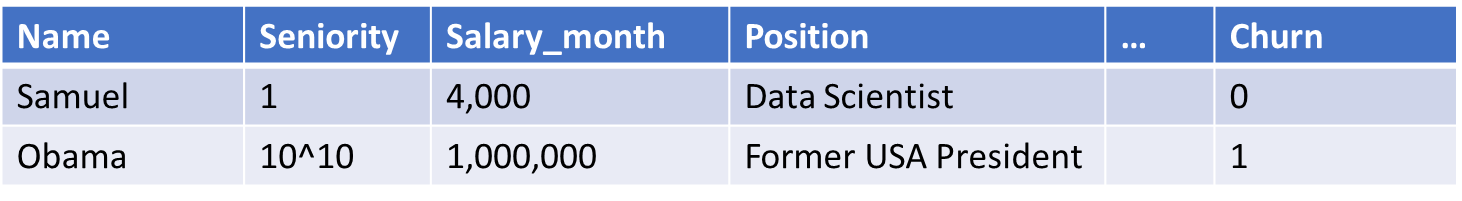

4. **Where's the data coming from? SaaS apps or maybe from the web (scrapping data)?**

    We have been provided with this data, but it could be in a Data Warehouse, Data Lake, in the web or in a SaaS App.

5. **Is this data representative? Do we need more or less data?**

  The data needs to describe all the features we outlined before. To know how much data we need is to multipy the degrees of freedom (this depends on the model) or the number of features by 10.


6. **What additional work is necessary to manipulate the data? Feature Engeneering.**

    Feature Engeneering is the transformation of the features in our data set and calculating something new; it could be using salary to make categories e.g. salary below 30k is considered 'low'.

7. **In what way the data can be visualized to answer the question? BI tools for interpretation.**

    Once we have our predictions and we have made sure that the model is precise, we can build a series of visualizations so the results are understood.

8. **Can we put the model into practice (deployment)?**

    Building a Data Product saves time and provides clear and useful information to users, so they can act in inmediate response to employees that have a higher probability of churning.

9. **Iterate: Improve the model through users feedback and testing.**

    This is the part when you get **roasted** as a Data Scientist. Improving is through trial and error, but feedback can accelerate the process.


# Importing Packages and Data.
---

Now, let's get to work.

Note: If you don't want to see the boring part of cleaning the data you can skip to the **Building the model** section.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
employees = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
employees.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


# Exploratory Data Analysis

---


EDA is a first diagnosis of the dataset, including the variables names and its types.

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [ ]:
employees.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Observed null values:
* educacion
* sexo
* implicacion
* satisfaccion_trabajo
* conciliacion
* anos_en_puesto

Exploring these columns will let us decide whether to drop them or impute values.

## Categorical Data

It's a good practice to drop a column when 30% or more of its data is null.

Building a function for that will help us make this process faster next time.

In [ ]:
def dropna_cols(df, perc):
  ''' This function drops columns which NAN values are x% or more.
  Args:
        df (DataFrame): Its the dataframe you want to edit .
        perc (int): The percentage .

  Returns:
      df (DataFrame): A DataFrame that no longer has columns
      that contained more than the percentage specified of NAN values.
  '''
  try:
    trsh = int(((100-perc)/100)*df.shape[0] + 1)
    df.dropna(axis=1, thresh=trsh, inplace=True)
  except ValueError:
    return df

In [ ]:
# Drop columns that have 30% or more of null's.
dropna_cols(employees, 30)

# Checking NA's
employees.isna().sum().sort_values(ascending=False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
mayor_edad                    0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
estado_civil                  0
num_empresas_anteriores       0
salario_mes                   0
abandono                      0
puesto                        0
nivel_laboral                 0
satisfaccion_entorno          0
empleados                     0
carrera                       0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

**anos_en_puesto** and **conciliacion** are not in the DataFrame anymore.


Another good practice is to drop rows containing nulls when they represent 5% or less of the data. Usually the rest is inputed. Let's build a function for it too.


In [ ]:
def dropna_rows(df, perc):
  ''' This function drops NA's rows if they amount to x% or less of all values.
  Args:
        df (DataFrame): Its the dataframe you want to edit .
        perc (int): The percentage you wish to drop.

  Returns:
      df (DataFrame): A DataFrame that no longer has columns
      that contained more than the percentage specified of NAN values.
  '''
  try:

    threshold = len(df) * perc
    cols_to_drop = df.columns[df.isna().sum() <= threshold]
    df.dropna(subset=cols_to_drop, inplace=True)

  except ValueError:
    return df

# Check the result
employees.isna().sum().sort_values(ascending=False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
mayor_edad                    0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
estado_civil                  0
num_empresas_anteriores       0
salario_mes                   0
abandono                      0
puesto                        0
nivel_laboral                 0
satisfaccion_entorno          0
empleados                     0
carrera                       0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

Exploring further the categorical variables will let us know what to do next. There might be hidden problems in the data.

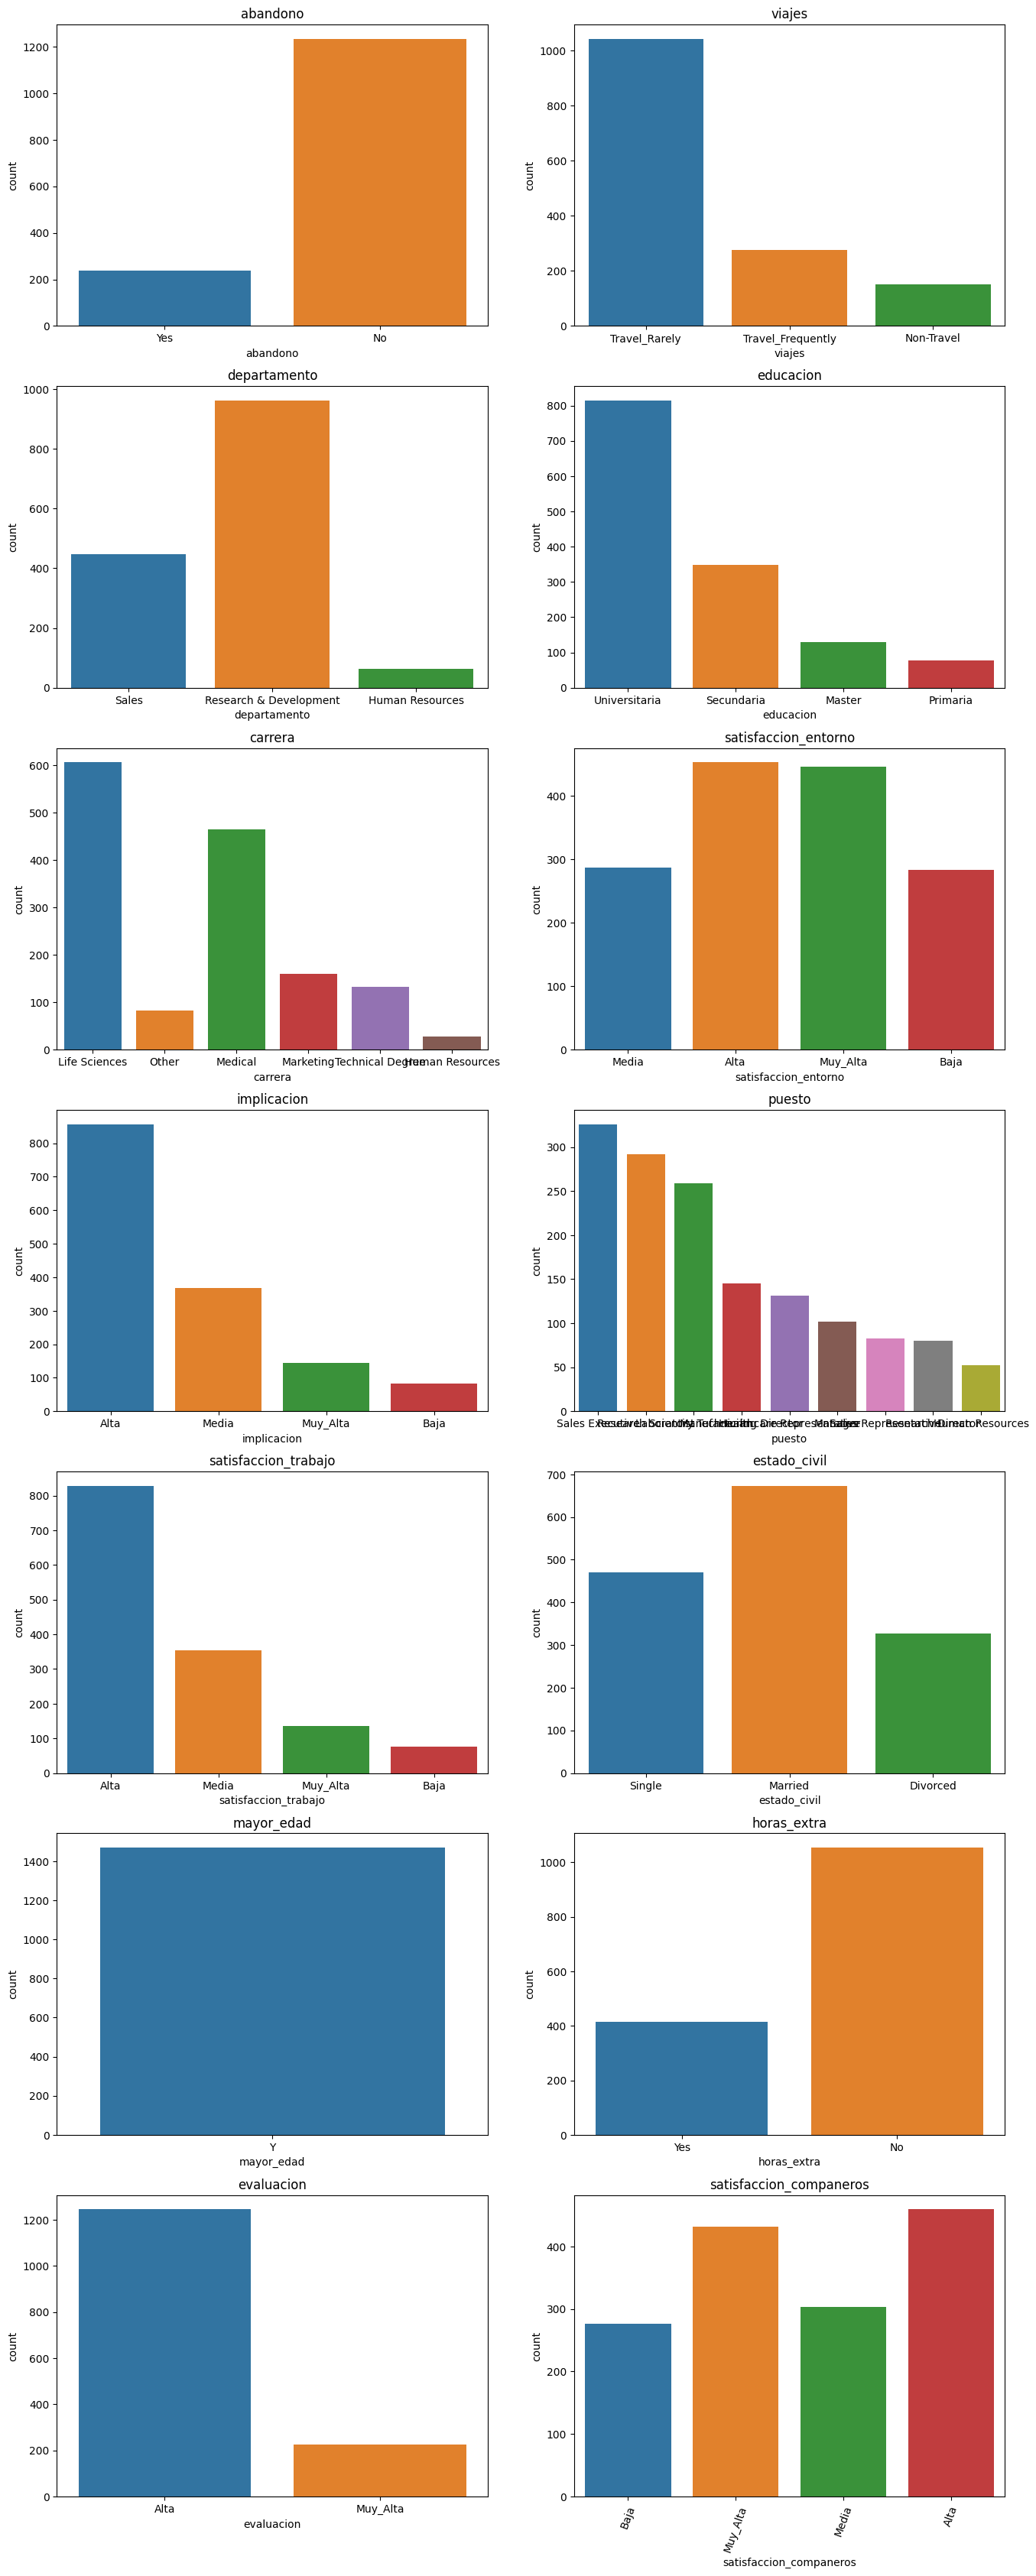

In [ ]:
def plot_categories(df, vars):
  '''
    This function creates multiple plots for certain variables

    Args:
        vars (dict, list or list-like): Variable selection,
        e.g. df.select_dtypes('O').

    Returns:
        Plots (fig): Multiple plots containing the selection
  '''
  from math import ceil
  try:
    filas = ceil(vars.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat

    for i, a in enumerate(vars):
      sns.countplot(x=str(a), data=df, ax=ax[i]).set(title=a)
      plt.xticks(rotation=70)
    plt.show()
  except ValueError:
    return f

# Explore the categorical variables plotting them.
plot_categories(employees, employees.select_dtypes('O'))

'mayor_edad' only has one value, everyone in the company is 18 or older so let's drop it since it doesnt add any useful information.

The categorical null columns left are:
* educacion
* satisfaccion_trabajo

Imputing categorical variables with the mode is statistacally 'correct', as we would be right most times when inputing nulls.


In [ ]:
# Get the both modes
edu_mode = employees['educacion'].mode()
satisfaccion_mode = employees['satisfaccion_trabajo'].mode()

# Print modes
print(edu_mode)
print(satisfaccion_mode)

0    Universitaria
Name: educacion, dtype: object
0    Alta
Name: satisfaccion_trabajo, dtype: object


In [ ]:
# Drop 'mayor_edad' column
employees.drop(columns=['mayor_edad'], inplace=True)

# Create a function for imputing null observations (categorical variables).
def impute_null_obs(df, col, string):
  '''
    This function fills NA's observations with the string you desire.

    Args:
        df (DataFrame): The DataFrame you wish to impute.
        col (str): The name of the column to impute in.
        string (str): The string to fill NA's with.

    Returns:
        df (DataFrame): The DataFrame updated.
  '''
  try:
    df[col] = df[col].fillna(string)
  except ValueError:
    return df

# Inpute 'educacion' and 'satisfaccion_trabajo' null values with 'Universitaria' and 'Alta' respectively
impute_null_obs(employees, 'educacion', 'Universitaria')
impute_null_obs(employees, 'satisfaccion_trabajo', 'Alta')
impute_null_obs(employees, 'implicacion', 'Alta')

# Lets see how many nulls we have now
employees.isna().sum().sort_values(ascending=False)

sexo                        199
edad                          0
salario_mes                   0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
num_empresas_anteriores       0
estado_civil                  0
abandono                      0
satisfaccion_trabajo          0
puesto                        0
nivel_laboral                 0
implicacion                   0
satisfaccion_entorno          0
empleados                     0
carrera                       0
educacion                     0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

Now we dont have any categorical nulls anymore.

## Numerical Data
---


Lets see the numerical dtypes now.

In [ ]:
# Create a function for exploring all the numerical variables during EDA.
def statistics(vars):
  ''' This function prints summary statistics for the subset selected.
  Args:
      vars (list or list-like): A selection of numerical variables.

  Returns:
      stats (DataFrame): A DataFrame containing summary statistics.
  '''
  stats = vars.describe().T
  stats['median'] = vars.median()
  stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]
  return(stats)

statistics(employees.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [ ]:
employees

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


Everything but **'salario_mes'** seems to be in a considerable range:

Minimun salary: **$1009**

Maximum salary: **$19999**

In [ ]:
employees[employees['salario_mes']==employees['salario_mes'].max()]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
259,52,No,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,1,Alta,2.0,...,14,Alta,Baja,80,1,34,5,33,11,9


This guy is a manager, so it's quite normal that he or she has a that kind of salary. But instead of 'male' or 'female' we see 2.0. What exactly does that mean?

In [ ]:
employees['sexo'].unique()

array([ 3.,  2.,  4., nan,  1.])

It seems like 'sexo' has only 4 values, we can infer that's categorical (nominal), but as we dont have anymore information regarding this variable, so, we will drop this column. Empleados only has one value, lets drop it too.

I'd say 1 and 2 would be 'male' or 'female', and the other 2 might be something like 'I choose not to respond'.

'horas_quincena' has only one value, its 80, so that means a full-time job (40 hours a week, 8 for 5 days), so, we will drop it too.

Droping:
* **sexo**
* **empleados**
* **horas_quincena**

In [ ]:
employees.drop(columns=['sexo', 'empleados', 'horas_quincena'], inplace=True)
employees.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2


In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

We dont have nulls in the data anymore.

# Business Analytics
---
Its starts geting interesting in this section. We will make a Business Analysis to determine:
* The employees churn rate.
* The most common type of employee that leaves the company.
* The economic impact of the problem.
* How much could we save if employees were more loyal to the company?
* Strategies for reducing churn.

## Churn rate
Proportion of employees that quit from the company; **16%.**

In [ ]:
employees['abandono'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: abandono, dtype: float64

## What are the characteristics of employees who churn?
In order to answer this, we will see diferent categorical features and try to find out the conditions that makes employees leave.

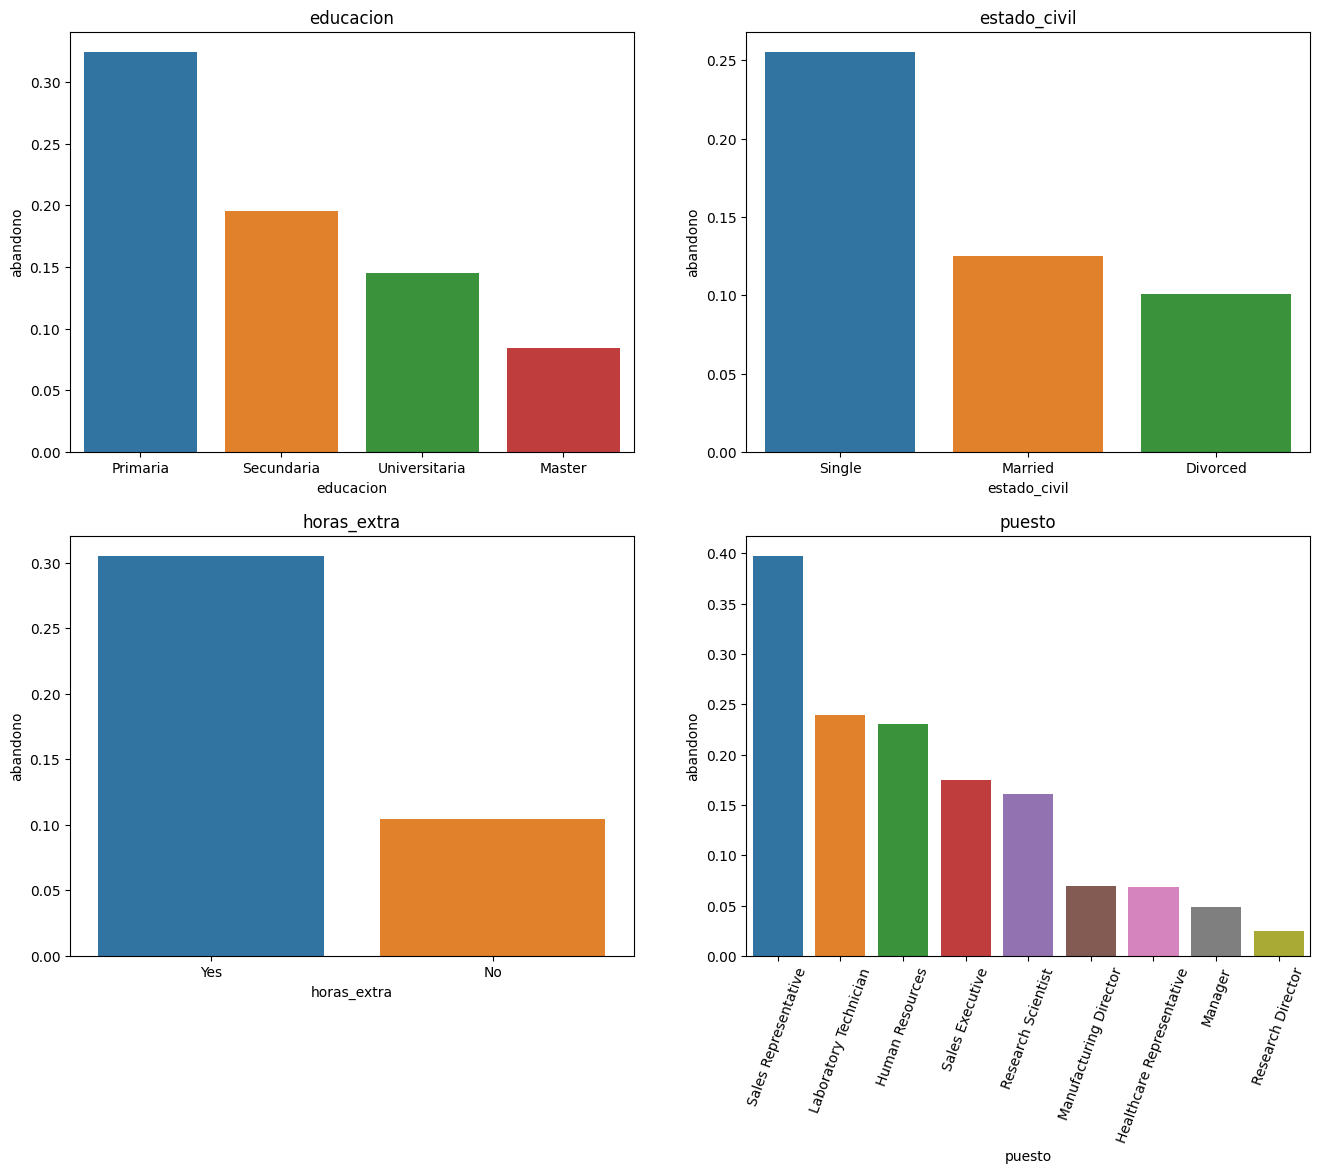

In [ ]:
# Create a function to plot profiles.
def plot_profile(df, subset, vars):
  '''
    This function creates one figure that plots the mean churn for every feature
    (average employee profile that churned).

    Args:
        df (DataFrame): The source dataframe.
        subset (str): The churn column name.
        vars (dict, list or list-like): Variable selection, e.g. df[['col1','col2']]

    Returns:
        Plots (fig): Multiple plots containing the selection
  '''
  # Transforming a feature into numerical and getting the mean will tell us
  # the average churn rate of that specific category.
  employees['abandono'] = employees.abandono.map({'No':0, 'Yes':1})
  from math import ceil

  try:
    filas = ceil(vars.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat
    for i, a in enumerate(vars):
      d = pd.DataFrame(df.groupby(a)[subset].mean().sort_values(ascending=False))
      sns.barplot(x=d.index, y=d.columns[0], data=d, ax=ax[i]).set(title=a)
      plt.xticks(rotation=70)
    plt.show()
  except ValueError:
    return f

plot_profile(employees, 'abandono', employees[['educacion', 'estado_civil', 'horas_extra', 'puesto']])

It seems like the average churn has these characteristics:
* Has elementary school level education.
* Is single.
* Works extra hours.
* Works as a Sales Representative.

## Economic impact
Lets how much money do we lose because of the employees churn.

According to the Center of American Progress (CAP), the average turnover cost of employees based on their salary is:
* 16.1% for salaries below $30,000 a year.

* 19.7% for salaries below $50,000 a year.

* 20.4% for salaries below $75,000 a year.

* 21.4% for all cases (we will take this as more than 75k a year)

You can see more detailed information at:

https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/


In [ ]:
# Create 'salario_ano'
employees['salario_ano'] = employees['salario_mes'] * 12

# Create conditions
conditions = [(employees['salario_ano'] < 30000),
              (employees['salario_ano'] >= 30000) & (employees['salario_ano'] < 50000),
              (employees['salario_ano'] >= 50000) & (employees['salario_ano'] < 75000),
              (employees['salario_ano'] >= 75000)
              ]

# Select what economic impact an employee will have based on 'conditions'
values = [employees['salario_ano']*0.161, employees['salario_ano']*0.197, \
          employees['salario_ano']*0.204, employees['salario_ano']*0.214]

# Calculate the impact of employees churn.
employees['impact'] = np.select(conditions, values)
employees.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


In [ ]:
# Calculate the total economic impact of employees churn.
total_turnover_cost = employees.loc[employees['abandono']==1, 'impact'].sum()
print('The total turnover cost is ${} USD'.format(int(total_turnover_cost)))

The total turnover cost is $2745910 USD


## Reducing Churn

It would be great to reduce churn, lets see some hypotetical cases.

In [ ]:
reduction = [10, 20, 30]
for i in reduction:
  print('Reducing the churn {}% would save ${} USD for the company.'.format(str(i), int(total_turnover_cost * (i/100))))

Reducing the churn 10% would save $274591 USD for the company.
Reducing the churn 20% would save $549182 USD for the company.
Reducing the churn 30% would save $823773 USD for the company.


In [ ]:
sub = employees.groupby('puesto')['abandono'].mean().sort_values(ascending=False)
churn_sales_rate = sub['Sales Representative']
churn_sales_rate

0.39759036144578314

Almost 40% of Sale Representatives churned last period.  What if we could reduce it?

In [ ]:
sales_rep = len(employees.loc[(employees['abandono']==0) & (employees['puesto']=='Sales Representative')])
will_churn = int(sales_rep * churn_sales_rate)
reduction = [10, 20, 30]
for i in reduction:
  retention = int(will_churn * (i / 100))
  savings = employees.loc[(employees['abandono']==0) & (employees['puesto']=='Sales Representative'), 'impact'].sum() \
                           * churn_sales_rate * (i / 100)
  print('Reducing the churn of Sales Representatives by {}% would retain {} agents and would save ${} USD for the company.'\
        .format(str(i), retention, savings))

Reducing the churn of Sales Representatives by 10% would retain 1 agents and would save $12495.06481445783 USD for the company.
Reducing the churn of Sales Representatives by 20% would retain 3 agents and would save $24990.12962891566 USD for the company.
Reducing the churn of Sales Representatives by 30% would retain 5 agents and would save $37485.19444337349 USD for the company.


# Ensuring Data Quality

To ensure data quality, there's some assumptions we need to make:

* Randomness: Our data is a sample of a larger population and representative.
* Independence: Each observation is independent from each other, if not, we can get more false negative/positive errors.
* Large enough: The sample is bug enough so that the Central Limit Theorem applies; if not, we could get wider confidence intervals
* If the Bootstrap distribution doesnt look 'normal' assumptions likely aren't valid. We can compute one just to make sure.


# Hypothesis Testing
---

## Average Salary
Is the average salary more than $80,000 a year? Lets see if this is true.

We suppose that the average salary is $80,000 a year.

Let's suppose an alpha = 0.05

* H0: salary = 70,000
  * reject if p < a
  * fail to reject if p > a

* HA: salary > 70,000
  * accept if we reject H0

In [ ]:
# Lets set the statistical significance (alpha) to 0.05
alpha_0_05 = 0.05

# Calculate the sample mean
hypothesis_mean = 70000
sample_mean = employees['salario_ano'].mean()
sample_mean

78035.17551020408

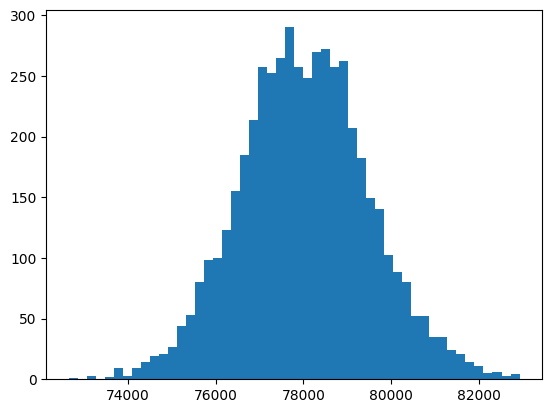

In [ ]:
# Calculating a boostrap distribution (to compute the standard deviation)
boostrap_dist = []
for i in range(5000):
  boostrap_dist.append(
    np.mean(
      employees.sample(frac=1, replace=True)['salario_ano']))
plt.hist(boostrap_dist, bins=50)
plt.show()

Like we mentioned before, one good sanity check in our data is making a Bootstrap distribution to see if looks 'normal', i.e looks like a normal distribution.

**In here, data seems to distribute normally.**

In [ ]:
# Calculating the z_score
std_error = np.std(boostrap_dist, ddof=1)
z_score = (sample_mean - hypothesis_mean) / std_error
z_score

5.459767443374433

In [ ]:
# Calculating the p_value
from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

2.3837932960901753e-08

In [ ]:
p_value <= alpha_0_05

True

Reject H0, that means **we have strong evidence that the average anual salary is greater than $70,000**

Now, let's calculate a confidence interval.

In [ ]:
lower = np.quantile(boostrap_dist, 0.025)
upper = np.quantile(boostrap_dist, 0.975)
print('We are 95% confident that the salary of our employees is between ${} and ${} a year'.format("%.2f" % lower, "%.2f" % upper))

We are 95% confident that the salary of our employees is between $75199.43 and $81063.22 a year


## Salary between positions
**Sales Representatives and Laboratory Technicians**

* H0: The average salary between Sales Representatives and Healthcare Representatives is the same.

* HA: The average salary is greater for Sales Representatives compared to Healthcare Representatives.

**M_salesrep** and **M_labtech** are the mean salary for Sales Representatives and Healthcare Representatives.

Therefore:
* H0:  M_labtech = M_salesrep
  * reject if p < a
  * fail to reject if p > a
* HA: M_labtech > M_salesrep

Let's suppose alpha = 0.01

**We'll use the next formula to compute the t-statistic.**

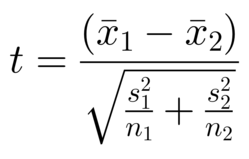

In [ ]:
# Set alpha
alpha_0_01 = 0.01

# Compute x bar
reps_bar = employees.groupby('puesto')['salario_ano'].mean() \
                [['Laboratory Technician', 'Sales Representative']]
print(reps_bar)
x_bar1 = reps_bar['Laboratory Technician']
x_bar2 = reps_bar['Sales Representative']

# Compute the std
reps_std = employees.groupby('puesto')['salario_ano'].std() \
                [['Laboratory Technician', 'Sales Representative']]
s1 = reps_std['Laboratory Technician']
s2 = reps_std['Sales Representative']

# Compute n
reps_count = employees.groupby('puesto')['salario_ano'].count() \
                [['Laboratory Technician', 'Sales Representative']]
n1 = reps_count['Laboratory Technician']
n2 = reps_count['Sales Representative']
degrees_freedom = n1 + n2 - 2

# Compute the t-statistic.
numerator = x_bar1 - x_bar2
denominator = np.sqrt(s1 ** 2 / n1 + s2**2 / n2)
t_stat = numerator / denominator
t_stat

puesto
Laboratory Technician    38846.03861
Sales Representative     31512.00000
Name: salario_ano, dtype: float64


5.182694076700932

In [ ]:
degrees_freedom

340

Use a **right-tailed** test to get a p-value.

In [ ]:
# For 1 sample stat use norm.cdf, for multiple we use t.cdf
from scipy.stats import t
p_value_t = 1 - t.cdf(t_stat, df=degrees_freedom)
p_value_t

1.879427919959653e-07

In [ ]:
p_value_t < alpha_0_01

True

Reject H0 in favor of HA, this is evidence **that the compensation of Laboratory Technicians is greater compared to Sales Representatives**

In [ ]:
import pingouin as pg

### ANOVA and Pairwise tests
Now we want to analyze the salary between positions. For that we'll perform an **ANOVA test**.

* Null hypotheis: There's no difference in salary between positions.
  *  H0: m1 = m2 = m3 = ... = mn
* Alternative hypotheis: At least one mean group is different.

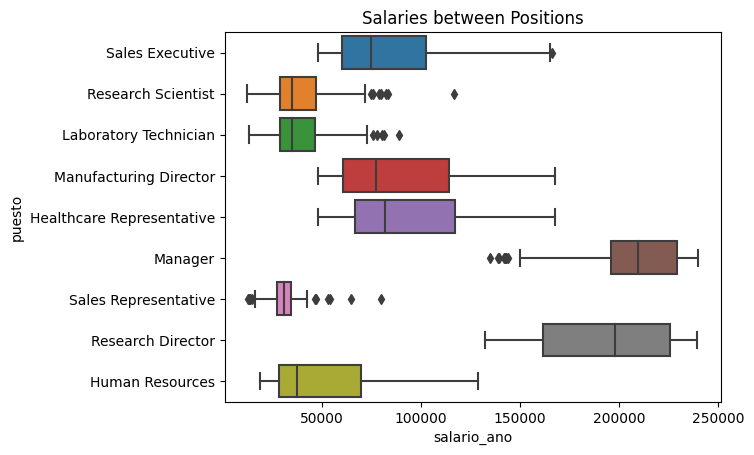

In [ ]:
sns.boxplot(data=employees, x='salario_ano', y='puesto')\
    .set(title='Salaries between Positions')
plt.show()

This is clear indication that there's a difference in salaries between positions, but lest perform an **ANOVA** test anyway just to double-check.

In [ ]:
anova_salary_position = pg.anova(data=employees, dv='salario_ano', between='puesto')
anova_salary_position

,Source,ddof1,ddof2,F,p-unc,np2
0,puesto,8,1461,810.214054,0.0,0.816058


In [ ]:
anova_salary_position['p-unc'] < alpha_0_01

0    True
Name: p-unc, dtype: bool

Reject H0 in favor of HA. This is strong evidence that **there's at least one mean group that's different**. Let's explore which ones.

In [ ]:
# Compute a pairwise between positions.
pt = pg.pairwise_tests(data=employees, dv='salario_ano', between='puesto', padjust='bonf')
pt['hypothesis'] = pt['p-corr'] < alpha_0_01
pt

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,hypothesis
0,puesto,Healthcare Representative,Human Resources,False,True,8.138165,97.386297,two-sided,1.332988e-12,4.798757e-11,bonf,8.783e+10,1.304558,True
1,puesto,Healthcare Representative,Laboratory Technician,False,True,18.390559,157.457621,two-sided,4.733302e-41,1.703989e-39,bonf,1.237e+51,2.454322,True
2,puesto,Healthcare Representative,Manager,False,True,-30.226055,225.297606,two-sided,3.145759e-81,1.132473e-79,bonf,1.927e+78,-3.932656,True
3,puesto,Healthcare Representative,Manufacturing Director,False,True,0.743407,273.303151,two-sided,4.578740e-01,1.000000e+00,bonf,0.172,0.089132,False
4,puesto,Healthcare Representative,Research Director,False,True,-22.011359,153.528163,two-sided,2.381214e-49,8.572370e-48,bonf,3.901e+52,-3.193116,True
5,puesto,Healthcare Representative,Research Scientist,False,True,18.411095,156.497553,two-sided,5.262091e-41,1.894353e-39,bonf,1.875e+52,2.476511,True
6,puesto,Healthcare Representative,Sales Executive,False,True,2.343506,225.377600,two-sided,1.997394e-02,7.190619e-01,bonf,1.592,0.249538,False
7,puesto,Healthcare Representative,Sales Representative,False,True,20.332088,171.827410,two-sided,1.356938e-47,4.884977e-46,bonf,1.005e+48,2.370724,True
8,puesto,Human Resources,Laboratory Technician,False,True,2.888764,55.635096,two-sided,5.501763e-03,1.980635e-01,bonf,7.701,0.689647,False
9,puesto,Human Resources,Manager,False,True,-31.676812,98.237314,two-sided,2.297482e-53,8.270934e-52,bonf,8.01e+64,-5.461422,True


In [ ]:
pt[pt['hypothesis']==False]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,hypothesis
3,puesto,Healthcare Representative,Manufacturing Director,False,True,0.743407,273.303151,two-sided,0.457874,1.000000,bonf,0.172,0.089132,False
6,puesto,Healthcare Representative,Sales Executive,False,True,2.343506,225.377600,two-sided,0.019974,0.719062,bonf,1.592,0.249538,False
8,puesto,Human Resources,Laboratory Technician,False,True,2.888764,55.635096,two-sided,0.005502,0.198063,bonf,7.701,0.689647,False
12,puesto,Human Resources,Research Scientist,False,True,2.882978,55.460026,two-sided,0.005596,0.201452,bonf,7.578,0.684277,False
18,puesto,Laboratory Technician,Research Scientist,False,True,-0.027993,545.556958,two-sided,0.977678,1.000000,bonf,0.095,-0.002380,False
22,puesto,Manager,Research Director,False,True,2.939238,151.304714,two-sided,0.003806,0.137033,bonf,8.464,0.447698,False
28,puesto,Manufacturing Director,Sales Executive,False,True,1.437060,248.274206,two-sided,0.151960,1.000000,bonf,0.299,0.150136,False


We should reject the null hypothesis for these pairs. This means that **the average salaries for these positions are not equal.**

## Independence.

**Hypothesis:** The age categories are independent of job satisfaction levels. **Alpha** set to 0.01

* H0: edad_cat and satisfaccion_entorno are independent.
  * reject if p < a
  * fail to reject if p > a
* HA: edad_cat and satisfaccion_entorno are not independent.


In [ ]:
# 30's look like a good baseline
employees['edad'].mean()

36.923809523809524

In [ ]:
# Feature engeneering: Create an age category variable.
numbers = [18, 30, np.inf]
labels = ['<30', '>=30']
employees['edad_cat'] = pd.cut(employees['edad'], bins=numbers, labels=labels)
employees.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,>=30
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,>=30
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,>=30
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,>=30
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,<30


Now lets explore visually how job satisfaction levels behave for age categories.

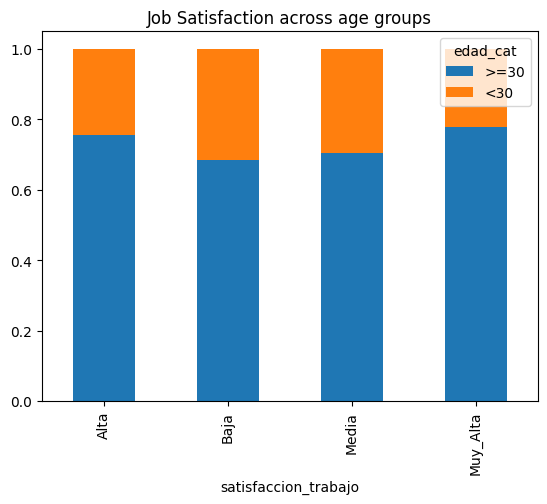

In [ ]:
# Create the plot
wide = employees.groupby('satisfaccion_trabajo')['edad_cat']\
                  .value_counts(normalize=True)\
                    .unstack()
wide.plot.bar(stacked=True).set(title='Job Satisfaction across age groups')
plt.show()

Theres some variation, but we'll need a chi-square independence test to see if it is significant difference.

In [ ]:
# Perform a chi-square independence test
expected, observed, stats = pg.chi2_independence(data=employees, x='satisfaccion_trabajo', y='edad_cat')
stats1 = stats[stats['test']=='pearson']
stats1

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.542896,3.0,0.136095,0.061406,0.483291


In [ ]:
stats1['pval'] < alpha_0_01

0    False
Name: pval, dtype: bool

Fail to reject H0; **age is independent from job satisfaction levels.**

Now let's see if job satisfaction is independent of age (viceversa).

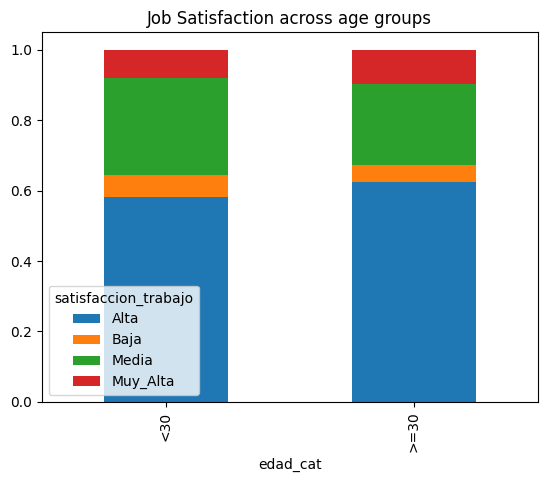

In [ ]:
# Create the plot
wide = employees.groupby('edad_cat')['satisfaccion_trabajo']\
                  .value_counts(normalize=True)\
                    .unstack()
wide.plot.bar(stacked=True).set(title='Job Satisfaction across age groups')
plt.show()

Again, we see difference in levels, lets test again if it's significant.

In [ ]:
# Perform a chi-square independence test
expected, observed, stats = pg.chi2_independence(data=employees, x='edad_cat', y='satisfaccion_trabajo')
stats2 = stats[stats['test']=='pearson']
stats2

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.542896,3.0,0.136095,0.061406,0.483291


In [ ]:
stats2['pval'] < alpha_0_01

0    False
Name: pval, dtype: bool

Fail to reject H0. This is evidence that **age is independent from job satisfaction levels and job satisfaction levels are independent from age.**

In [ ]:
# Lets see categorical variables independece with 'abandono'
def independence_test(data, var_list, var):
  ''' This function creates a DataFrame object with multiple chi2 independence
      tests performed with a list of vars and one other target variable.

  Args:
        data (DataFrame): Its the dataframe we want to test on.
        var_list (list or list-like): A selection of variables we want to test
        on.
        var (str): A selection of one variable from data, usually a target
        variable.

  Returns:
      stats_final (DataFrame): A DataFrame with all chi2 tests.
  '''
  try:

    stats_final = pd.DataFrame(columns=['test', 'lambda', 'chi2', 'dof', 'pval', 'cramer', 'power', 'hypothesis', 'vars', 'target'])
    stats_final['hypothesis'] = stats_final['hypothesis'].astype(bool)

    for i in var_list:
      expected, observed, stats = pg.chi2_independence(data=data, x=i, y=var)
      stats = stats[stats['test']=='pearson']
      stats['hypothesis'] = stats['pval'] < alpha_0_01
      stats['vars'] = str(i)
      stats['target'] = str(var)
      stats_final = pd.concat([stats_final, stats])
    stats_final.drop(columns=['test'], inplace=True)
    stats_final = stats_final[['vars', 'target', 'lambda', 'chi2', 'dof', 'pval', 'cramer', 'power', 'hypothesis']]
  except: ValueError
  return stats_final

Hypothesis:
All selected variables are independent from 'abandono'. Alpha set to 0.01
* H0: Variables are independent from abandono.
  * reject if p < a
  * fail to reject if p > a
* HA: Variables are not independent from abandono.

In [ ]:
var_list = ['viajes', 'departamento', 'educacion', 'carrera',
  'satisfaccion_entorno', 'implicacion', 'puesto', 'satisfaccion_trabajo',
    'estado_civil', 'horas_extra', 'evaluacion', 'satisfaccion_companeros']

#stats_final = independence_test(employees, var_list, 'abandono')

We should reject the hypothesis for all vars except 'evaluacion' and 'satisfaccion_companeros', for the later two, this means that they're independent from abandono, in other words, **they don't affect 'abandono'**, so we'll drop them.

## Proportion tests.

**Hypothesis:** The proportion of churns is the same for employees younger than 30 and for those older than 30. **Alpha set to 0.01**

* H0: prop_churn_18_30 = prop_churn_30_inf
* HA: prop_churn_18_30 =! prop_churn_30_inf

In [ ]:
# Let's check the proportions of employees who churned based on their age categrory.
prop_test = employees.groupby('edad_cat')['abandono'].value_counts()
prop_test

edad_cat  abandono
<30       0           282
          1            96
>=30      0           947
          1           137
Name: abandono, dtype: int64

We notice a diference in churn based on age; **its higher for employees above 30.** Let's see if it is significant.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
n_employees = np.array([96, 136])
n_rows = np.array([278 + 96, 934 + 136])
z_score, p_value = proportions_ztest(count=n_employees, nobs=n_rows, alternative='two-sided')
print((z_score, p_value))

(5.874347285541066, 4.245126065620412e-09)


In [ ]:
p_value < alpha_0_01

True

Reject H0, in favor of HA. This is strong evidence that **the proportion of churns is different for employees younger than 30 and for those older than 30.**


## Non-parametric t-test for 2 groups: The Wilcoxon-Mann-Whitney test.
This is the equivalent version of 2 proportion t-tests but for non-parametric cases (unpaired data).

Hypothesis: Salary is the same for employees younger and older than 30 years old.

* H0: salary_18_30 = salary_30_inf
  * reject if p < a
  * fail to reject if p > a
* HA: salary_18_30 =! salary_30_inf


 First we need the data in wide format.


In [ ]:
# Let's suppose we dont have enough data so the Central Limit Theorem applies
employees_susbset = employees.sample(n=5, replace=False, random_state=123)

# Wide format
age_vs_jobsat = employees_susbset[['salario_ano', 'edad_cat']]
age_vs_jobsat_wide = age_vs_jobsat.pivot(columns='edad_cat', values='salario_ano')
age_vs_jobsat_wide

edad_cat,<30,>=30
id,,
55,27516.0,NaN
100,NaN,51744.0
346,28080.0,NaN
517,NaN,30912.0
1945,NaN,66732.0


In [ ]:
# Apply the Wilcoxon-Mann-Whitney test
mwu_test = pg.mwu(x=age_vs_jobsat_wide['<30'], y=age_vs_jobsat_wide['>=30'], alternative='two-sided')
mwu_test

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.2,1.0,0.0


In [ ]:
mwu_test['p-val'] < alpha_0_01

MWU    False
Name: p-val, dtype: bool

Fail to reject H0, this is evidence that **salary is the same between younger and older than 30 y/o employees**.


## Non-parametric ANOVA: The Kruskal-Wallis test.
This is the equivalent version of ANOVA tests but for non-parametric cases.
* H0: Mean salary is equal across all job satisfaction levels.
* HA: At least one mean salary is different across job satisfaction levels.

In [ ]:
kruskal_test = pg.kruskal(data=employees, dv='salario_ano', between='satisfaccion_trabajo')
kruskal_test

,Source,ddof1,H,p-unc
Kruskal,satisfaccion_trabajo,3,0.785556,0.852919


In [ ]:
kruskal_test['p-unc'] < alpha_0_01

Kruskal    False
Name: p-unc, dtype: bool

Fail to reject H0, this is evidence that **the mean salary is equal across all job satisfaction levels.**



# Building the model.
---
Now we can start building the **classification model** model.

**Target Variable:** abandono.

We'll use a Desition Tree model so we can observe which features discriminate **the target variable** the most


In [ ]:
# First make a copy of the dataset
ml_df = employees.copy()
ml_df.head()

In [ ]:
# Import train_test_split and OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Categorical
cat = ml_df.select_dtypes('O')
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

# Numerical
num = ml_df.select_dtypes('number').reset_index(drop = True)

# Combine Categorical and Numerical
ml_df = pd.concat([cat_ohe,num], axis = 1)
ml_df

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25656.888
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [ ]:
# Define X and y
X = ml_df.drop(columns='abandono')
y = ml_df['abandono']
y.value_counts()

0    1233
1     237
Name: abandono, dtype: int64

## Centering and scaling

Data can have different scales. If the scales are different, they can disproportionate the models accuracy. So to ensure a good model we'll center and scale the data.

**Numerical data**; age (years), salary (amount), experience (years).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Scale
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
dtc_scaled = DecisionTreeClassifier(max_depth=4)
dtc_scaled.fit(X_trained_scaled, y_train)

# Make predictions using X_test
predictions_scaled = dtc_scaled.predict_proba(X_test_scaled)[:, 1]

# How good is the model?
roc_auc_score(y_test, predictions_scaled)

0.7182702850877192

## Hyperparameter Tuning.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Hyperparameter Tuning
params = {'max_depth': np.arange(2, 10),
          'min_samples_split':np.arange(2, 10),
          'min_samples_leaf': np.arange(2, 6)}

# Instantiate a KFold cross validator
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# Instantiate a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Perform the Cross Validation
cross_validation = GridSearchCV(dt, params, cv=kf)
cross_validation.fit(X_train, y_train)

# Check which parameters are the best
print("Tuned DecisionTreeClassifier Parameters: {}".format(cross_validation.best_params_))
print("Tuned DecisionTreeClassifier Best Accuracy Score: {}".format(cross_validation.best_score_))

Tuned DecisionTreeClassifier Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Tuned DecisionTreeClassifier Best Accuracy Score: 0.8357281553398058


Let's measure the models performance again with this parameters and then visualize the Decision Tree.

In [ ]:
# Instantiate a tuned DecisionTreeClassifier
dtc_tuned = DecisionTreeClassifier(max_depth=4, min_samples_split=4, min_samples_leaf=2)
dtc_tuned.fit(X_train, y_train)

# Make predictions using X_test_scaled
predictions_tuned = dtc_tuned.predict_proba(X_test)[:, 1]

# Get the roc_auc_score of the tuned model.
roc_auc_score(y_test, predictions_tuned)

0.7260142543859648

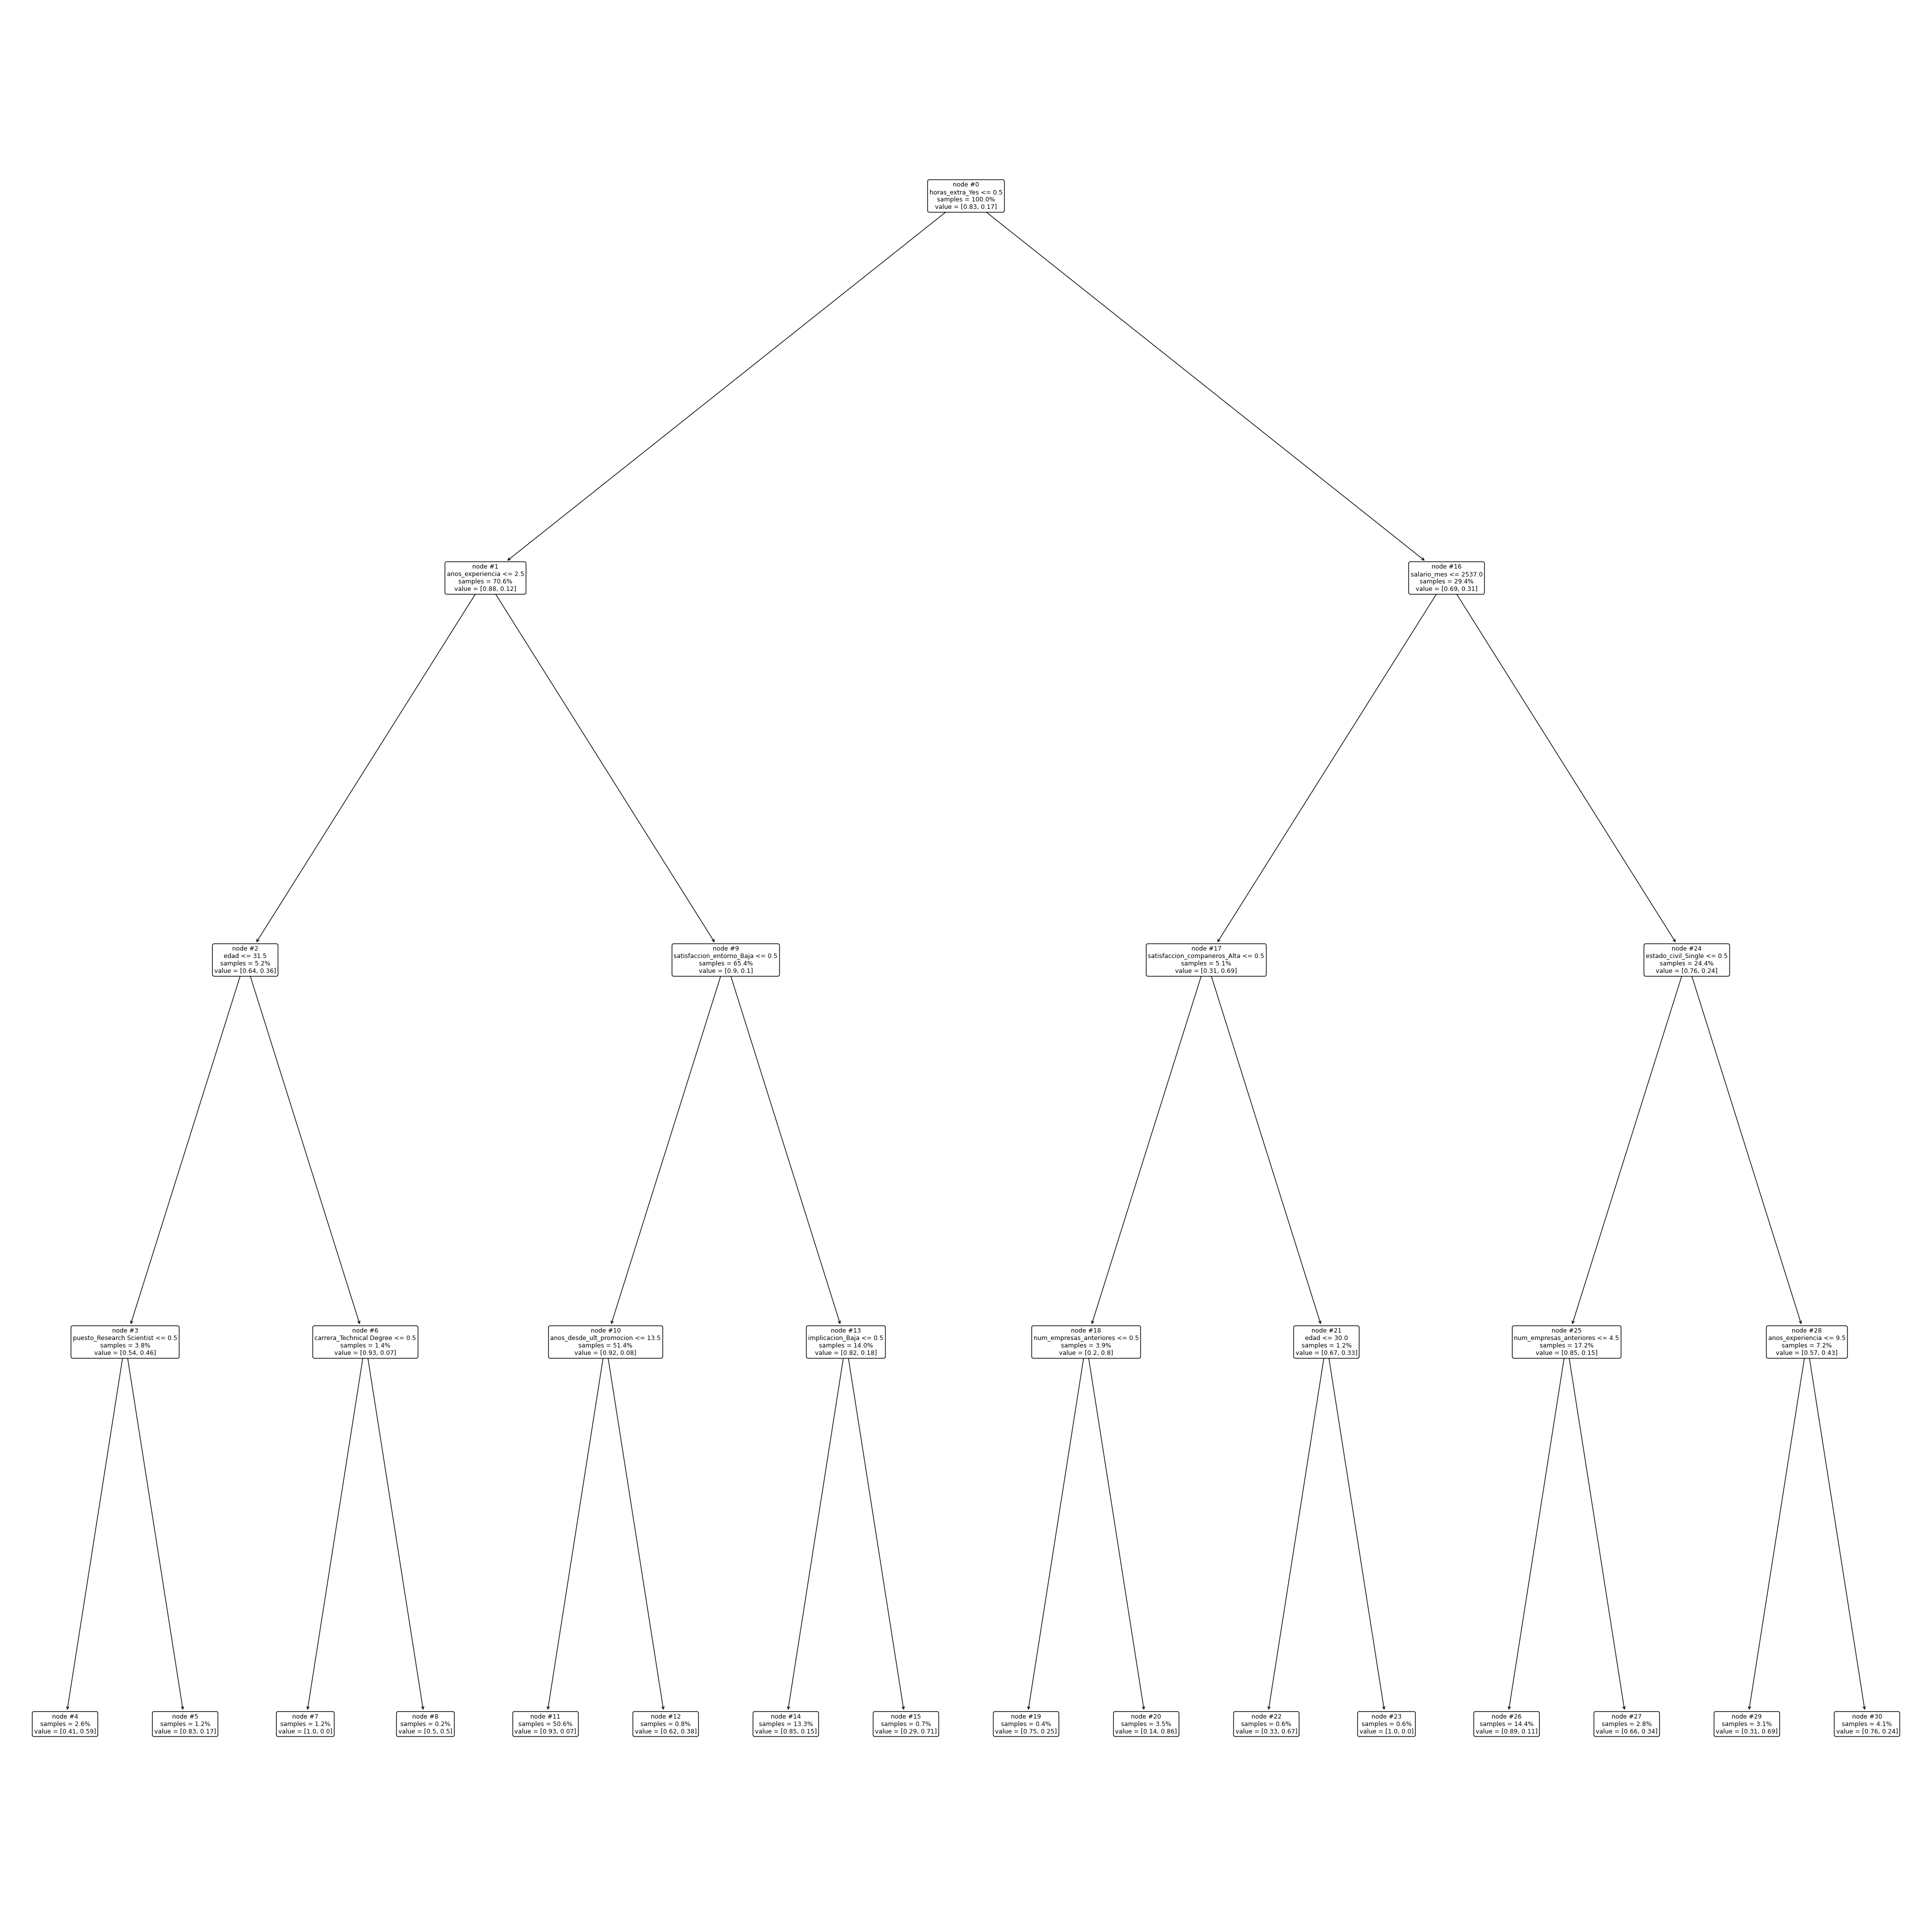

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(dtc_tuned,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

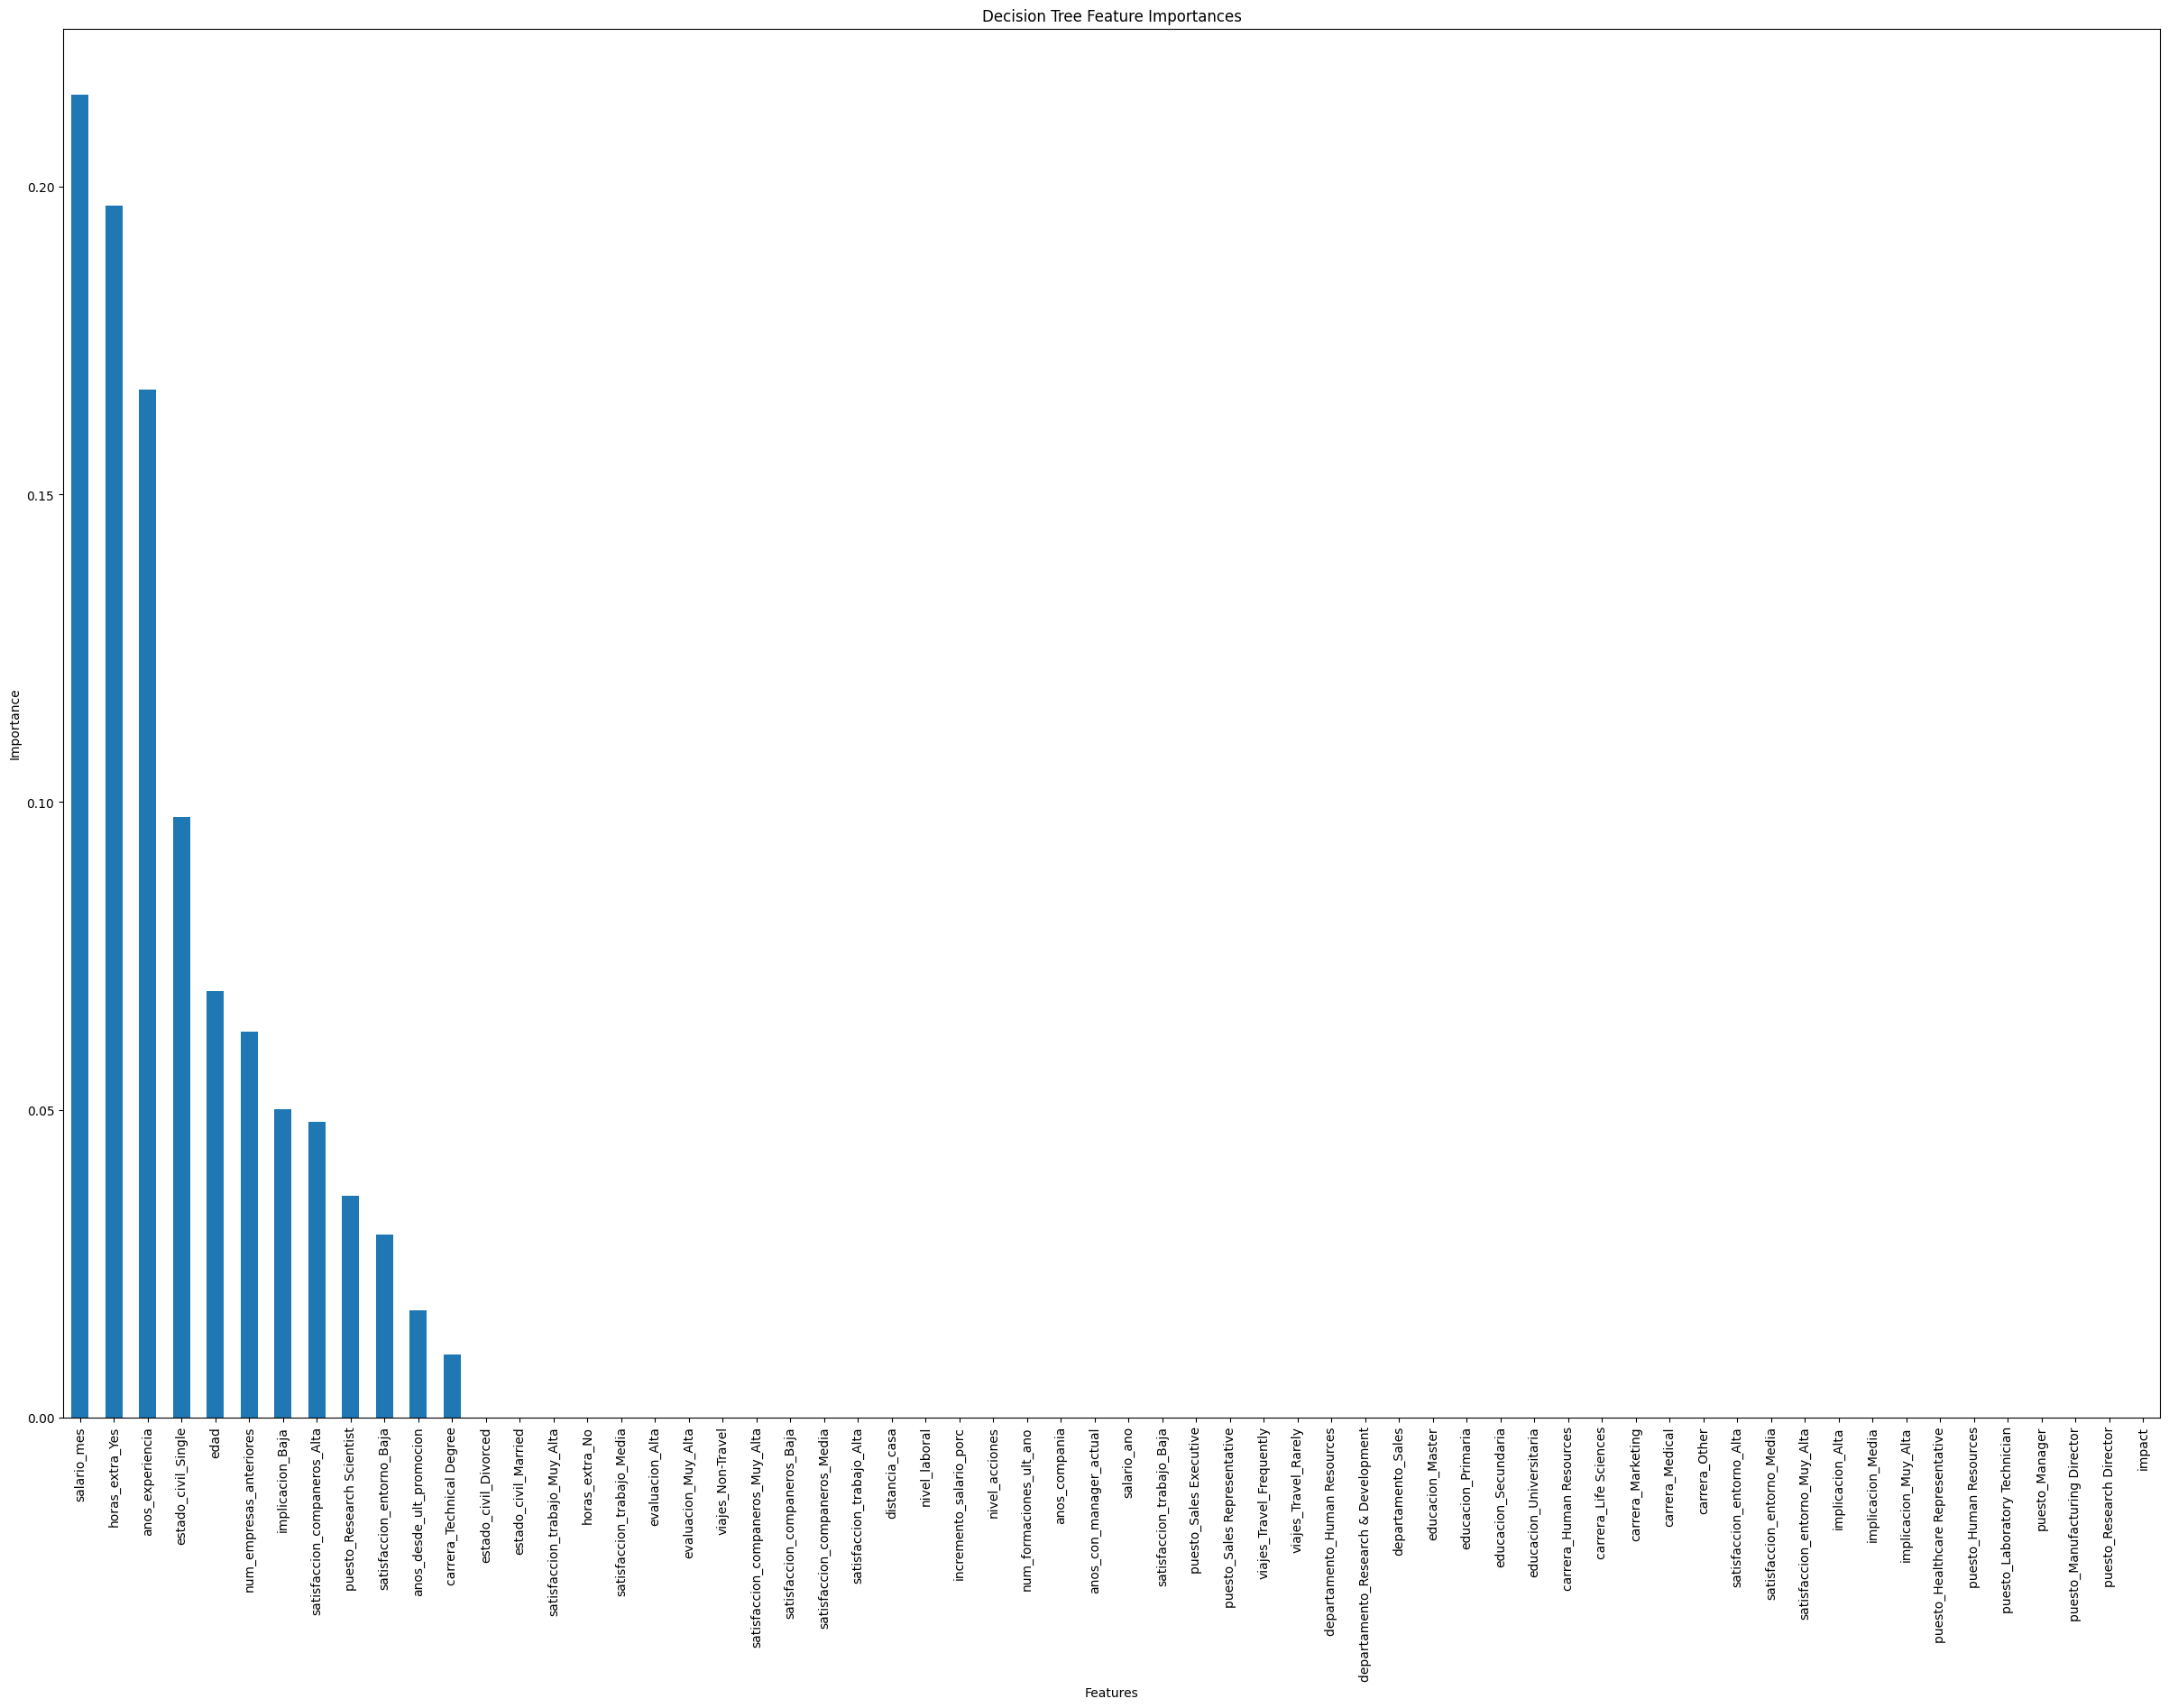

In [ ]:
a = pd.Series(dtc_tuned.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

## Adding predictions to original dataset
Let's add the predictions to our original dataset so we can work with them visually.

In [ ]:
employees['scoring_abandono'] = dtc_tuned.predict_proba(ml_df.drop(columns = 'abandono'))[:, 1]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,8,0,6,0,5,71916,14670.864,>=30,0.687500
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,61560,12558.240,>=30,0.071017
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,7,3,0,0,0,25080,4037.880,>=30,0.861111
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,34908,6876.876,>=30,0.114865
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,41616,8198.352,<30,0.153285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,1,17,3,5,0,3,30852,6077.844,>=30,0.071017
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,1,9,5,7,1,7,119892,25656.888,>=30,0.071017
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,1,6,0,6,0,3,73704,15035.616,<30,0.114865


In [ ]:
# Set the Dataframe into Excel
from google.colab import files
employees.to_excel('abandono_w_scores.xlsx')
files.download('abandono_w_scores.xlsx')